Accuracy (Test): 0.75
Precision (Test): 0.65
Recall (Test): 0.67
F1 Score (Test): 0.66


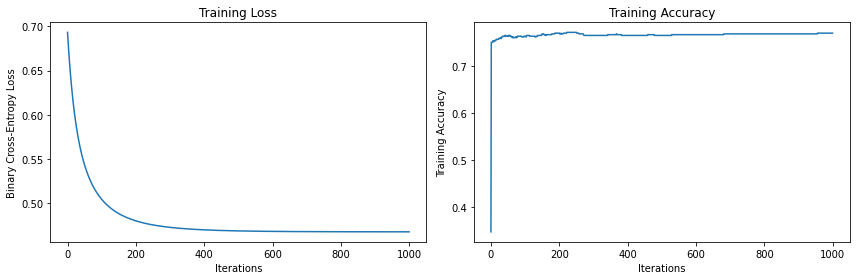

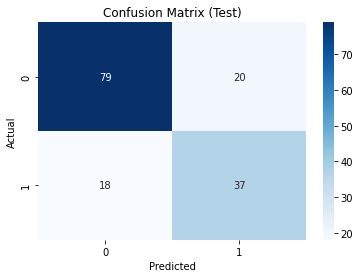

In [3]:
#PROBLEM 1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('diabetes.csv')

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split the data in training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

num_features = X_train.shape[1]
weights = np.zeros(num_features)
bias = 0

# Hyperparameters
learning_rate = 0.05
num_iterations = 1000

# Lists to store training results
losses = []
accuracies = []

#logistic regression model
for i in range(num_iterations):
    logits = np.dot(X_train, weights) + bias
    
    predictions = sigmoid(logits)
    
    loss = -np.mean(y_train * np.log(predictions) + (1 - y_train) * np.log(1 - predictions))

    gradient_weights = np.dot(X_train.T, (predictions - y_train)) / len(y_train)
    gradient_bias = np.sum(predictions - y_train) / len(y_train)

    weights -= learning_rate * gradient_weights
    bias -= learning_rate * gradient_bias

    y_pred = (predictions >= 0.5).astype(int)
    accuracy = np.mean(y_pred == y_train)

    losses.append(loss)
    accuracies.append(accuracy)

logits_test = np.dot(X_test, weights) + bias
predictions_test = sigmoid(logits_test)
y_pred_test = (predictions_test >= 0.5).astype(int)

#accuracy, precision, recall, and F1 score for the test set
accuracy_test = np.mean(y_pred_test == y_test)
precision_test = np.sum((y_pred_test == 1) & (y_test == 1)) / np.sum(y_pred_test == 1)
recall_test = np.sum((y_pred_test == 1) & (y_test == 1)) / np.sum(y_test == 1)
f1_test = 2 * (precision_test * recall_test) / (precision_test + recall_test)

print(f"Accuracy (Test): {accuracy_test:.2f}")
print(f"Precision (Test): {precision_test:.2f}")
print(f"Recall (Test): {recall_test:.2f}")
print(f"F1 Score (Test): {f1_test:.2f}")

# Plot the training results
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.xlabel("Iterations")
plt.ylabel("Binary Cross-Entropy Loss")
plt.title("Training Loss")

plt.subplot(1, 2, 2)
plt.plot(accuracies)
plt.xlabel("Iterations")
plt.ylabel("Training Accuracy")
plt.title("Training Accuracy")

plt.tight_layout()
plt.show()

# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test)')
plt.show()


Accuracy (Test): 0.98
Precision (Test): 0.98
Recall (Test): 0.98
F1 Score (Test): 0.98


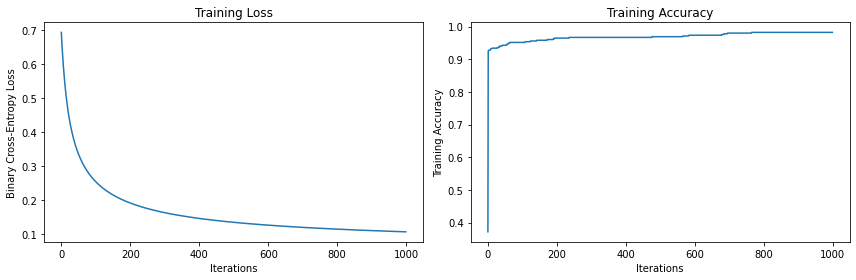

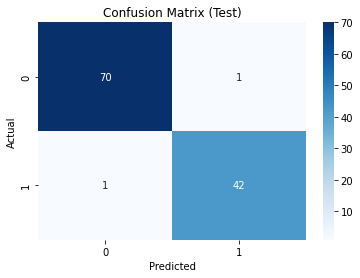

In [16]:
#PROBLEM 2(A)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

data = pd.read_csv('cancer.csv')

X = data.iloc[:, 2:].values
y = data.iloc[:, 1].map({'M': 1, 'B': 0}).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='mean')  
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

num_features = X_train.shape[1]
weights = np.zeros(num_features)
bias = 0

# Hyperparameters
learning_rate = 0.01
num_iterations = 1000

losses = []
accuracies = []

#logistic regression model
for i in range(num_iterations):

    logits = np.dot(X_train, weights) + bias

    predictions = 1 / (1 + np.exp(-logits))

    loss = -np.mean(y_train * np.log(predictions) + (1 - y_train) * np.log(1 - predictions))

    gradient_weights = np.dot(X_train.T, (predictions - y_train)) / len(y_train)
    gradient_bias = np.sum(predictions - y_train) / len(y_train)

    weights -= learning_rate * gradient_weights
    bias -= learning_rate * gradient_bias

    y_pred = (predictions >= 0.5).astype(int)
    accuracy = np.mean(y_pred == y_train)

    losses.append(loss)
    accuracies.append(accuracy)

logits_test = np.dot(X_test, weights) + bias
predictions_test = 1 / (1 + np.exp(-logits_test))
y_pred_test = (predictions_test >= 0.5).astype(int)

#accuracy, precision, recall, and F1 score for the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

print(f"Accuracy (Test): {accuracy_test:.2f}")
print(f"Precision (Test): {precision_test:.2f}")
print(f"Recall (Test): {recall_test:.2f}")
print(f"F1 Score (Test): {f1_test:.2f}")

# Plot the training results
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.xlabel("Iterations")
plt.ylabel("Binary Cross-Entropy Loss")
plt.title("Training Loss")

plt.subplot(1, 2, 2)
plt.plot(accuracies)
plt.xlabel("Iterations")
plt.ylabel("Training Accuracy")
plt.title("Training Accuracy")

plt.tight_layout()
plt.show()

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test)')
plt.show()


Accuracy (Test): 0.97
Precision (Test): 0.98
Recall (Test): 0.95
F1 Score (Test): 0.96


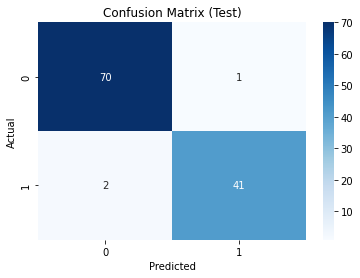

In [3]:
#PROBLEM 2(B)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

data = pd.read_csv('cancer.csv')

X = data.iloc[:, 2:].values
y = data.iloc[:, 1].map({'M': 1, 'B': 0}).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Add L2 regularization (weight penalty)
model = LogisticRegression(penalty='l2', C=1.0)
model.fit(X_train, y_train)

y_pred_test = model.predict(X_test)

#accuracy, precision, recall, and F1 score for the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

print(f"Accuracy (Test): {accuracy_test:.2f}")
print(f"Precision (Test): {precision_test:.2f}")
print(f"Recall (Test): {recall_test:.2f}")
print(f"F1 Score (Test): {f1_test:.2f}")

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test)')
plt.show()


Accuracy (Naive Bayes Test): 0.96
Precision (Naive Bayes Test): 0.98
Recall (Naive Bayes Test): 0.93
F1 Score (Naive Bayes Test): 0.95


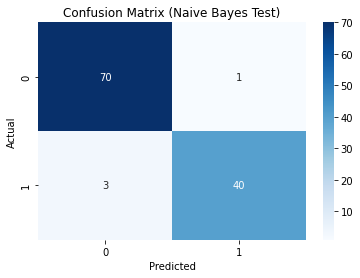

In [6]:
#PROBLEM 3

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer  # Import SimpleImputer for handling missing values
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

data = pd.read_csv('cancer.csv')

X = data.iloc[:, 2:].values
y = data.iloc[:, 1].map({'M': 1, 'B': 0}).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='mean')  
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Gaussian Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

y_pred_test = model.predict(X_test)

#accuracy, precision, recall, and F1 score for the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

print(f"Accuracy (Naive Bayes Test): {accuracy_test:.2f}")
print(f"Precision (Naive Bayes Test): {precision_test:.2f}")
print(f"Recall (Naive Bayes Test): {recall_test:.2f}")
print(f"F1 Score (Naive Bayes Test): {f1_test:.2f}")

# Plot the confusion matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Naive Bayes Test)')
plt.show()


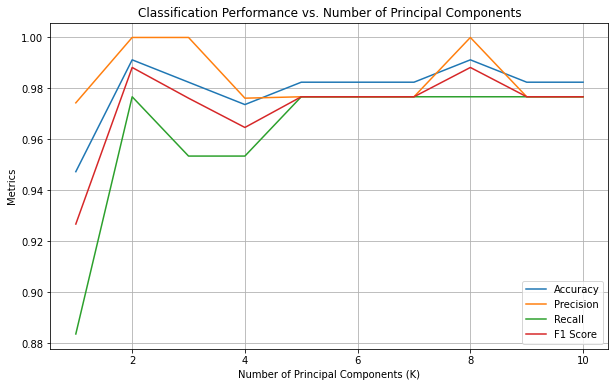

Optimal number of principal components (K) for highest accuracy: 2


In [9]:
#PROBLEM 4

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer

data = pd.read_csv('cancer.csv')

X = data.iloc[:, 2:].values
y = data.iloc[:, 1].map({'M': 1, 'B': 0}).values

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#range of values for K (number of principal components)
K_values = range(1, 11) 

accuracies = []
precisions = []
recalls = []
f1_scores = []

for K in K_values:
    # Apply PCA with K components
    pca = PCA(n_components=K)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    model = LogisticRegression()
    model.fit(X_train_pca, y_train)

    y_pred_test = model.predict(X_test_pca)

    accuracy = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Plot classification performance metrics vs. number of components (K)
plt.figure(figsize=(10, 6))
plt.plot(K_values, accuracies, label='Accuracy')
plt.plot(K_values, precisions, label='Precision')
plt.plot(K_values, recalls, label='Recall')
plt.plot(K_values, f1_scores, label='F1 Score')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Metrics')
plt.title('Classification Performance vs. Number of Principal Components')
plt.legend()
plt.grid(True)
plt.show()

optimal_K = K_values[np.argmax(accuracies)]
print(f'Optimal number of principal components (K) for highest accuracy: {optimal_K}')


In [11]:
#Optimal number of principal components (K) for highest accuracy: 2

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer

data = pd.read_csv('cancer.csv')

X = data.iloc[:, 2:].values
y = data.iloc[:, 1].map({'M': 1, 'B': 0}).values

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

#logistic regression model
model = LogisticRegression()
model.fit(X_train_pca, y_train)

y_pred_test = model.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Accuracy: 0.99
Precision: 1.00
Recall: 0.98
F1 Score: 0.99


Accuracy: 0.96
Precision: 0.98
Recall: 0.93
F1 Score: 0.95


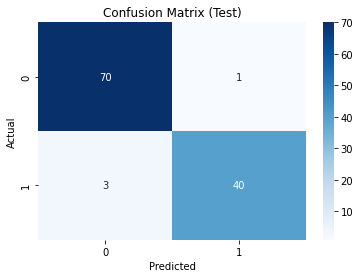

In [13]:
# PROBLEM 5 
# PROBLEM 3 CODE, NAIVE BAYESIAN CLASSIFIER

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
import seaborn as sns

data = pd.read_csv('cancer.csv')

X = data.iloc[:, 2:].values
y = data.iloc[:, 1].map({'M': 1, 'B': 0}).values

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Gaussian Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

y_pred_test = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test)')
plt.show()


Accuracy: 0.97
Precision: 0.98
Recall: 0.95
F1 Score: 0.96


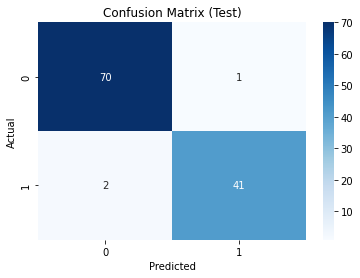

In [17]:
# REPLACING IT WITH LOGISTIC REGRESSION CLASSIFIER

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
import seaborn as sns

data = pd.read_csv('cancer.csv')

X = data.iloc[:, 2:].values
y = data.iloc[:, 1].map({'M': 1, 'B': 0}).values

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred_test = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test)')
plt.show()
